Training on make
Visualizing triplet sample: 0


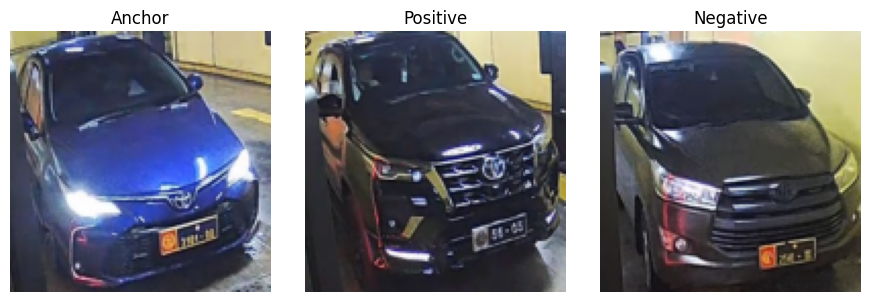

Visualizing triplet sample: 1


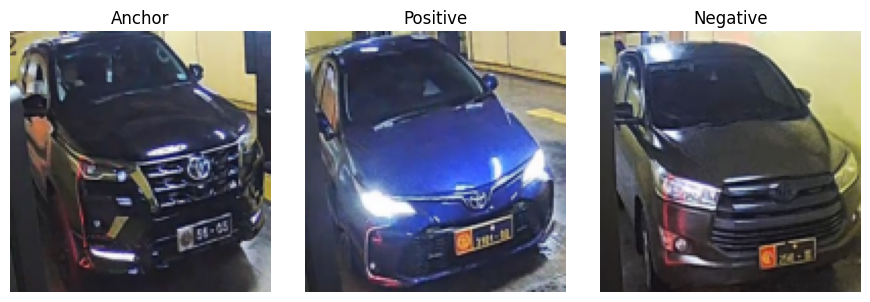

Visualizing triplet sample: 2


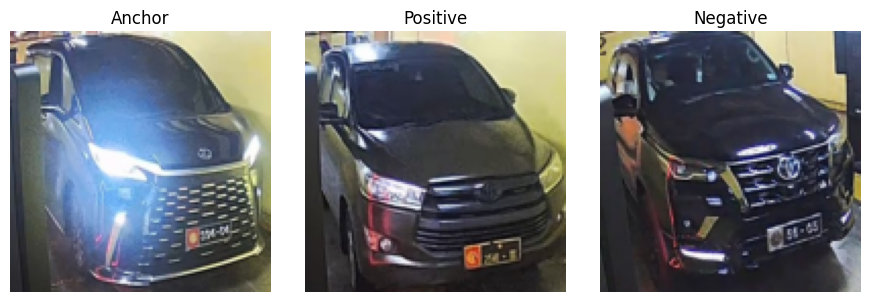

In [1]:
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from datasets import TripletMMCDataset

# Example DataFrame (you should replace this with your actual DataFrame)
# Columns: make, model, color, path, make_encoded, model_encoded
df = pd.DataFrame({
    "make": ["toyota", "toyota", "toyota", "lexus"],
    "model": ["corolla", "fortuner", "innova", "lm"],
    "color": ["cyan", "black", "green", "black"],
    "path": [
        "test_image/0_toyota_corolla_cyan_B1EBM1_2025-05-25T05_31_14.495Z_310100.jpg.jpg",
        "test_image/2_toyota_fortuner_black_B1EBM1_2025-05-26T07_19_39.902Z_5605.jpg.jpg",
        "test_image/4_toyota_innova_green_B1EBM2_2025-05-26T03_37_28.617Z_2541.jpg.jpg",
        "test_image/6_lexus_lm_black_B1EBM2_2025-05-26T05_28_54.383Z_39454.jpg.jpg"
    ],
    "make_encoded": [0, 0, 1, 1],
    "model_encoded": [0, 0, 1, 1]
})

# Dummy transform (resize + tensor)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Import the dataset class from earlier
# from your_module import TripletImageDataset

# Instantiate dataset (train or test)
dataset = TripletMMCDataset(df, transform=transform, train=True, train_model=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Visualize one triplet
def show_triplet(triplet_batch):
    (anchor, positive, negative), _ = triplet_batch

    def imshow(tensor_img, title):
        img = TF.to_pil_image(tensor_img.squeeze(0))
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")

    plt.figure(figsize=(9, 3))
    # imshow(anchor[0], "Anchor")
    plt.subplot(1, 3, 1)
    imshow(anchor[0], "Anchor")
    plt.subplot(1, 3, 2)
    imshow(positive[0], "Positive")
    plt.subplot(1, 3, 3)
    imshow(negative[0], "Negative")
    plt.tight_layout()
    plt.show()

# Run the test
for i, triplet in enumerate(dataloader):
    print("Visualizing triplet sample:", i)
    show_triplet(triplet)
    if i == 2:  # Show only 3 triplets
        break
